# Count the number of leaves present in an image

## Import all dependencies

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from scipy import ndimage as ndi

## Read the image

In [2]:
path = '/content/img_1.jpg'

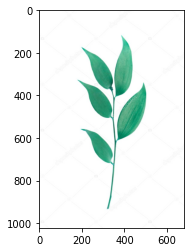

In [3]:
# Read the image using cv2.imread
img = cv2.imread(path)
plt.imshow(img)

## Image pre-processing

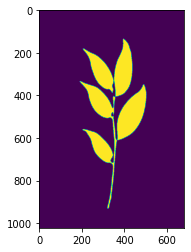

In [4]:
# Convert to gray-scale, pass it through guassian filter and again threshold (to make it black and white). 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  
blur = cv2.GaussianBlur(gray,(23,23),0)  
thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]  
plt.imshow(thresh)

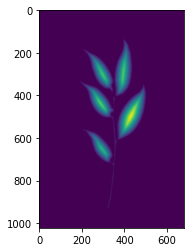

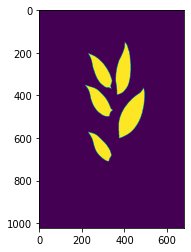

In [5]:
# Find the background area
kernel = np.ones((2,2),np.uint8)
erode = cv2.erode(thresh,kernel,iterations=2)  
bg = cv2.dilate(erode,kernel,iterations=4)  

# Find the foreground area
dist_transform = cv2.distanceTransform(thresh,cv2.DIST_L2,3)
plt.imshow(dist_transform)
plt.show()

# Perform distance transform
fg = cv2.threshold(dist_transform,0.15*dist_transform.max(),255,0)[1]
fg = np.uint8(fg)
plt.imshow(fg)
plt.show()

# Labelling to Isolate the leaves

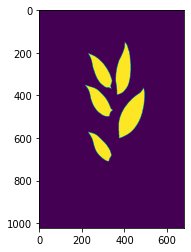

In [6]:
# Label and isolate the leaves using mask size
label_objects = ndi.label(fg)[0]
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 1000
mask_sizes[0] = 0
fg1 = mask_sizes[label_objects]
fg1 = np.uint8(fg.astype(int))
plt.imshow(fg1)

# Using cotours and counting

Number of leaves: 5


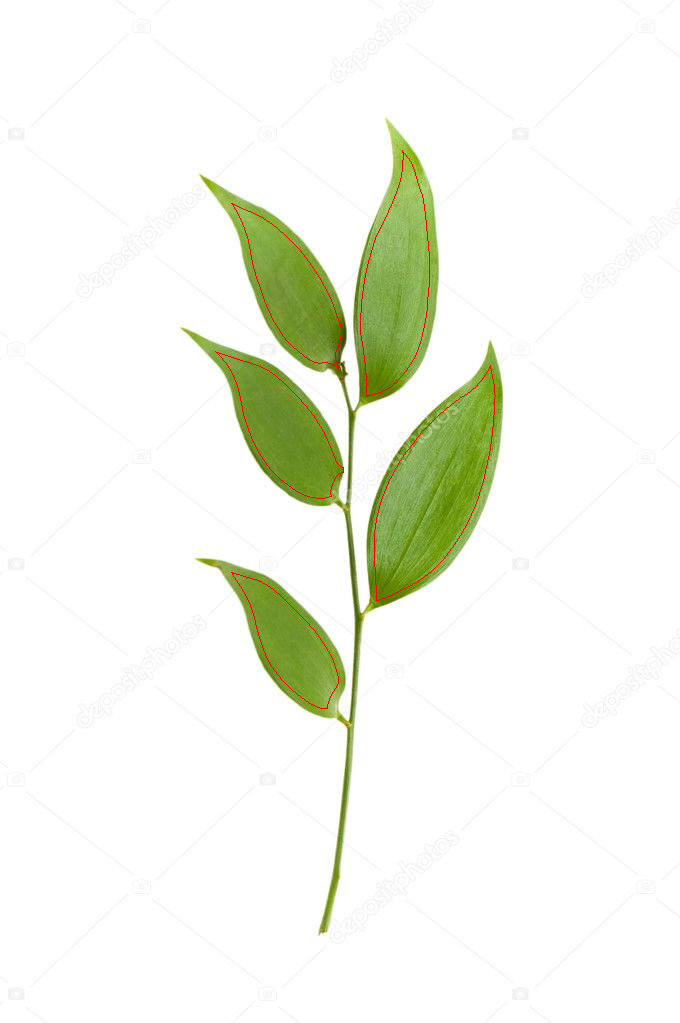

In [7]:
# Draw the contours on leaves, count the total number of contours and show the output
img = cv2.imread(path)

(contours,count) = cv2.findContours(fg1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img,contours,-1,(0,0,255),1)
print('Number of leaves:',len(count[0]))
cv2_imshow(img)